In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 5.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
from ultralytics import YOLO

In [3]:
# Load the model
model = YOLO('yolov8n.pt')


100%|██████████| 6.23M/6.23M [00:00<00:00, 89.6MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!yolo task=detect mode=train model=yolov8n.pt imgsz=640 data=custom.yaml epochs=25 batch=8 name=yolov8n_custom_25_aug

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=custom.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom_25_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/yolov8n_custom_10/weights/best.pt name=yolov8n_eval data=pothole_v8.yaml imgsz=1280

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 528, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py", line 143, in __call__
    self.data = check_det_dataset(self.args.data)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/utils.py", line 269, in check_det_dataset
    file = check_file(datas

In [16]:
model_cus = YOLO('/content/runs/detect/yolov8n_custom_10_aug/weights/best.pt')

In [ ]:
results = model_cus('/content/sample_data/4 (19).jpg')  # Предположим, что model_cus возвращает список с результатами
for result in results:
    # detection
    result.boxes.xyxy   # box with xyxy format, (N, 4)
    result.boxes.xywh   # box with xywh format, (N, 4)
    result.boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
    result.boxes.xywhn  # box with xywh format but normalized, (N, 4)
    result.boxes.conf   # confidence score, (N, 1)
    result.boxes.cls    # cls, (N, 1)

print(result.boxes.xyxyn,   # box with xyxy format, (N, 4)
    result.boxes.cls )


In [ ]:
image_path='/content/sample_data/4 (19).jpg'


In [ ]:
print(result.boxes.xywhn ,   # box with xyxy format, (N, 4)
    result.boxes.cls )

tensor([[0.4945, 0.3220, 0.1607, 0.0844],
        [0.5024, 0.3716, 0.1185, 0.0513]], device='cuda:0') tensor([2., 4.], device='cuda:0')



image 1/1 /content/runs/detect/yolov8n_custom_10/weights/4 (1).jpg: 384x640 1 2, 1 4, 6.8ms
Speed: 3.0ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


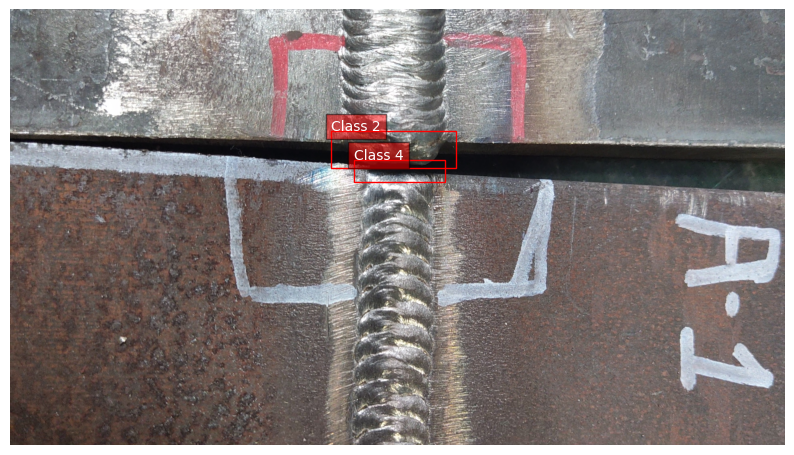

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
# Загрузка изображения
image = Image.open(image_path)

# Детекция объектов на изображении
results = model_cus(image_path)  # Предположим, что model_cus возвращает результаты на GPU

# Извлечение координат и классов bounding box'ов из результатов
boxes = results[0].boxes.xywhn.cpu().detach().numpy()  # Конвертируем в NumPy массив
classes = results[0].boxes.cls.cpu().detach().numpy()  # Конвертируем в NumPy массив

# Функция для рисования bounding box'ов и текста классов на изображении
def draw_boxes(image, boxes, classes):
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    ax = plt.gca()
    for box, cls in zip(boxes, classes):
        x, y, w, h = box
        x_min = (x - w / 2) * image.width
        y_min = (y - h / 2) * image.height
        width = w * image.width
        height = h * image.height

        # Рисуем bounding box
        rect = plt.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Добавляем текст с классом
        ax.text(x_min, y_min - 5, f'Class {int(cls)}', bbox=dict(facecolor='red', alpha=0.5), fontsize=10, color='white')

    plt.axis('off')
    plt.show()

# Визуализация bounding box'ов и классов на изображении
draw_boxes(image, boxes, classes)


In [18]:
import pandas as pd
from pathlib import WindowsPath

# ДЛЯ ОБРАБОТКИ ТЕСТОВОГО НАБОРА ИЗОБРАЖЕНИЙ И ЗАПИСИ В CSV
import os
image_dir = '/content/drive/MyDrive/weld/test_dataset'
output_csv = 'submission.csv'
# Создаем пустой DataFrame с необходимыми столбцами
df = pd.DataFrame(columns=["filename", "class_id", "rel_x", "rel_y", "width", "height"])

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):  # Предположим, что у вас изображения в формате JPEG
        image_path = os.path.join(image_dir, filename)

        # Детекция объектов на изображении
        results = model_cus(image_path)

    for result in results:
              boxes = result.boxes.xywhn
              confidence = result.boxes.conf

              # Преобразуем классы в список чисел
              class_ids = [cls.item() for cls in result.boxes.cls]

              for box, conf, class_id in zip(boxes, confidence, class_ids):
                  x_rel, y_rel, width, height = box.tolist()

                  # Выводим номер класса для проверки
                  print(f"Processing class_id: {class_id}")

                  # Добавляем данные в DataFrame
                  df = pd.concat([df, pd.DataFrame([{
                      "filename": filename,
                      "class_id": int(class_id),  # Преобразуем тензор в число!!!
                      "rel_x": x_rel,
                      "rel_y": y_rel,
                      "width": width,
                      "height": height
                  }])], ignore_index=True)

df.to_csv(output_csv, index=False, sep=";")



image 1/1 /content/drive/MyDrive/weld/test_dataset/2 (51).jpg: 384x640 (no detections), 7.8ms
Speed: 2.0ms preprocess, 7.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/weld/test_dataset/3 (124).jpg: 384x640 (no detections), 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/weld/test_dataset/2 (47).jpg: 384x640 (no detections), 6.2ms
Speed: 1.6ms preprocess, 6.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/weld/test_dataset/3 (10).jpg: 384x640 (no detections), 6.5ms
Speed: 1.6ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/weld/test_dataset/2 (10).jpg: 384x640 (no detections), 6.4ms
Speed: 1.7ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/weld/test_

In [ ]:
df.head(5)

,filename,class_id,rel_x,rel_y,width,height
0,7 (96).jpg,1,0.236835,0.436281,0.104076,0.034848
1,7 (96).jpg,2,0.785898,0.499422,0.113646,0.137576
2,8 (2).jpg,3,0.717042,0.575406,0.111387,0.066745
3,8 (2).jpg,2,0.490644,0.596689,0.286074,0.100507
4,8 (2).jpg,2,0.493134,0.134493,0.261471,0.067789
